## Business Case - Treadmil
#### Tradmil is a leading brand in the field of fitness equipment. Tradmil provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


## Problem Statement

#### The market research team at Treadmil wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
#### 1 . Perform descriptive analytics to create a customer profile for each Treadmil treadmill product by developing appropriate tables and charts. 
#### 2 . For each Treadmil treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('treadmil.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Null values

In [5]:
df.isnull().sum()/len(df)*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [6]:
df['Price'] = df['Product'].apply(lambda x:1500 if x=='KP281'else 1750 if x=='KP481' else 2500)

### Unique values in each rows

In [7]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [8]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [9]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [11]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [12]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [13]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [14]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [15]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

In [16]:
df['Price'].unique()

array([1500, 1750, 2500], dtype=int64)

In [17]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles,Price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


#### Here we can observe that in the Income and Miles the standard deviation is more.
#### Might be because there are more outliers in these columns.

In [18]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [19]:
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x:1 if x=='Partnered' else 0)

#### Converted Gender and Marital Status columns to int dtype.

In [20]:
df.describe()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,0.577778,15.572222,0.594444,3.455556,3.311111,53719.577778,103.194444,1805.555556
std,6.943498,0.495291,1.617055,0.492369,1.084797,0.958869,16506.684226,51.863605,387.978895
min,18.000000,0.000000,12.000000,0.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000
25%,24.000000,0.000000,14.000000,0.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000
50%,26.000000,1.000000,16.000000,1.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000
75%,33.000000,1.000000,16.000000,1.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000
max,50.000000,1.000000,21.000000,1.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000


#### We can observe that the in the Income and in Miles the standard deviation is more, might be because of more outliers. we'll verify this throgh boxplots

### Value counts

In [21]:
df['Gender'].value_counts()

1    104
0     76
Name: Gender, dtype: int64

#### We got Male mostly in the dataset almost 58%


In [22]:
df['MaritalStatus'].value_counts()

1    107
0     73
Name: MaritalStatus, dtype: int64

#### We got almost 60% of the data who are married.

In [23]:
df['Price'].value_counts()

1500    80
1750    60
2500    40
Name: Price, dtype: int64

#### Here we can observe that most of the values are of KP281

In [24]:
df['Price'].value_counts()

1500    80
1750    60
2500    40
Name: Price, dtype: int64

#### Mostly people tend to buy KP281 threadmil followed by KP481 and then KP781.

## Outlier analysis

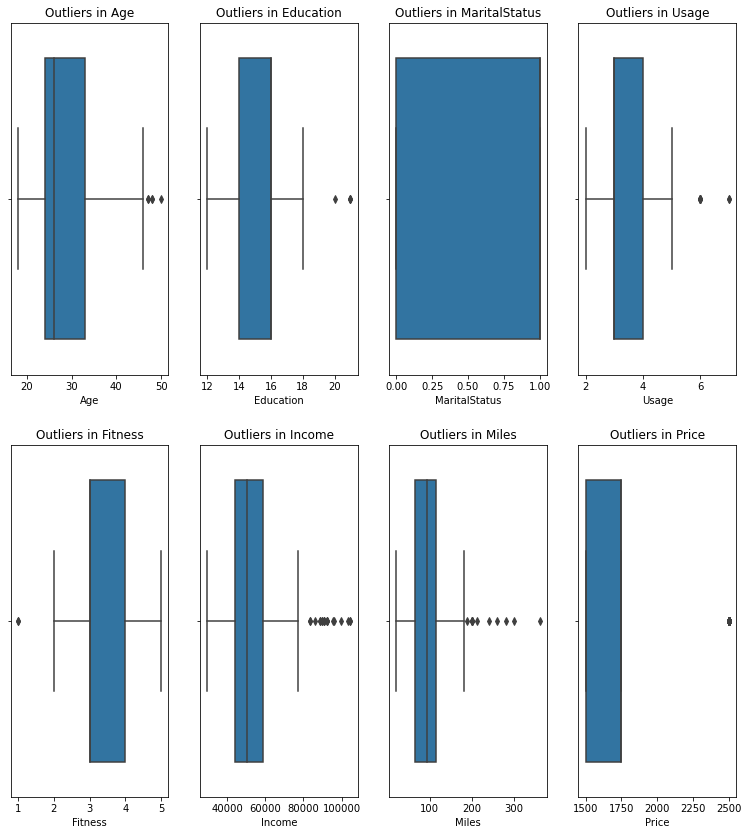

In [25]:
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(13, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(x='Age',data = df,ax=axis[0,0]).set_title('Outliers in Age')
sns.boxplot(x='Education',data = df,ax=axis[0,1]).set_title('Outliers in Education')
sns.boxplot(x='MaritalStatus',data = df,ax=axis[0,2]).set_title('Outliers in MaritalStatus')
sns.boxplot(x='Usage',data = df,ax=axis[0,3]).set_title('Outliers in Usage')
sns.boxplot(x='Fitness',data = df,ax=axis[1,0]).set_title('Outliers in Fitness')
sns.boxplot(x='Income',data = df,ax=axis[1,1]).set_title('Outliers in Income')
sns.boxplot(x='Miles',data = df,ax=axis[1,2]).set_title('Outliers in Miles')
sns.boxplot(x='Price',data = df,ax=axis[1,3]).set_title('Outliers in Price')

plt.show()

#### Here we can observe the above point as there are lot of outliers in the Income and Miles compared to others.

## Visualizing Distributions

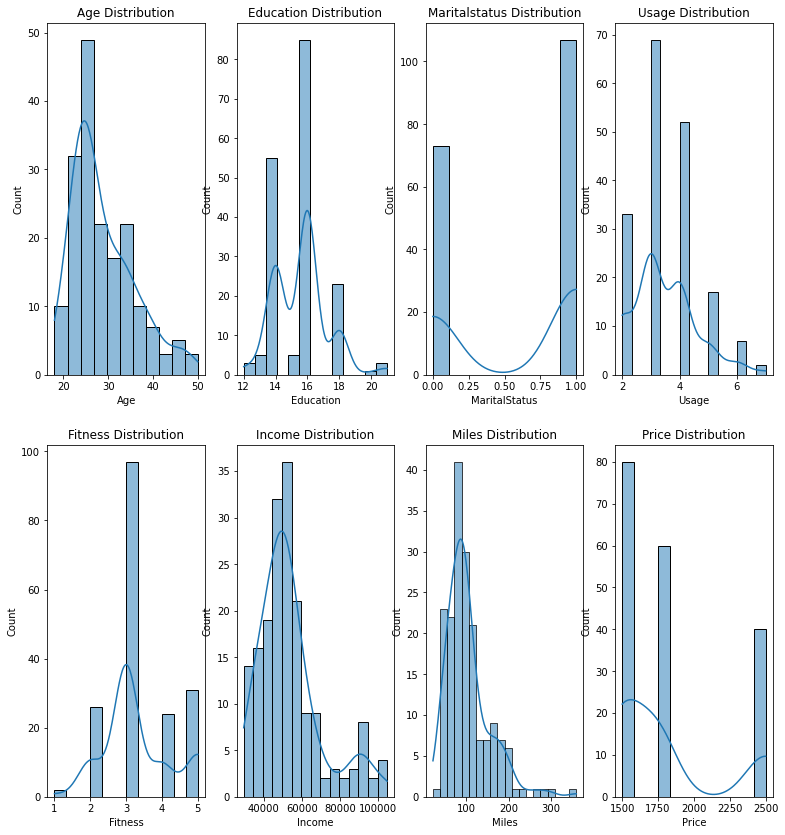

In [26]:
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(13, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(x='Age',kde=True,data = df,ax=axis[0,0]).set_title('Age Distribution')
sns.histplot(x='Education',kde=True,data = df,ax=axis[0,1]).set_title('Education Distribution')
sns.histplot(x='MaritalStatus',kde=True,data = df,ax=axis[0,2]).set_title('Maritalstatus Distribution')
sns.histplot(x='Usage',kde=True,data = df,ax=axis[0,3]).set_title('Usage Distribution')
sns.histplot(x='Fitness',kde=True,data = df,ax=axis[1,0]).set_title('Fitness Distribution')
sns.histplot(x='Income',kde=True,data = df,ax=axis[1,1]).set_title('Income Distribution')
sns.histplot(x='Miles',kde=True,data = df,ax=axis[1,2]).set_title('Miles Distribution')
sns.histplot(x='Price',kde=True,data = df,ax=axis[1,3]).set_title('Price Distribution')

plt.show()

#### 1. Age - The customers between 25-30 are more in number.
#### 2. Customers with 16 years of education is more in number.
#### 3. Customers who are married are more in number.
#### 4. Most customers are thinking of using 3 times per week.
#### 5. Customers with average rating of fitness i.e. 2.5-3.0 are buying more.
#### 6. Most customers are in the income range of 45k-55k.
#### 7. Most customers tend to walk 90-110 Miles per week.
#### 8. As said above the most bought item is KP281, then KP481 and finally KP781.

## Univariate Analysis

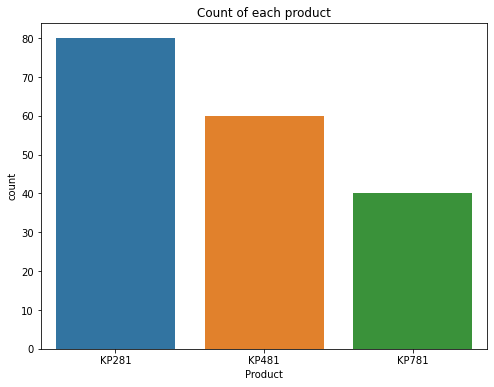

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='Product',data=df)
plt.title('Count of each product')
plt.show()


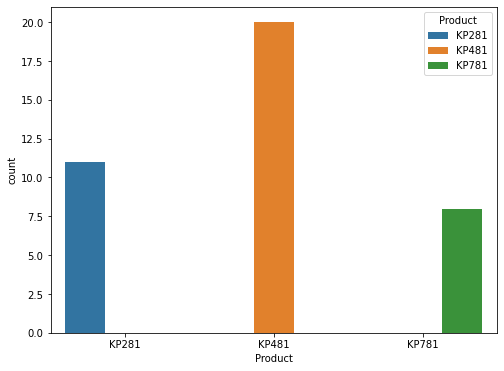

In [28]:
df1 = df[(df['Miles']> 90)]
df1 = df1[df1['Miles']<=110]
plt.figure(figsize=(8,6))
sns.countplot(x='Product',data=df1,hue='Product')
plt.show()

#### The distribution of people who walk 90-110 are more in number, so in here also the people who walk miles in this range are buying KP481 more.

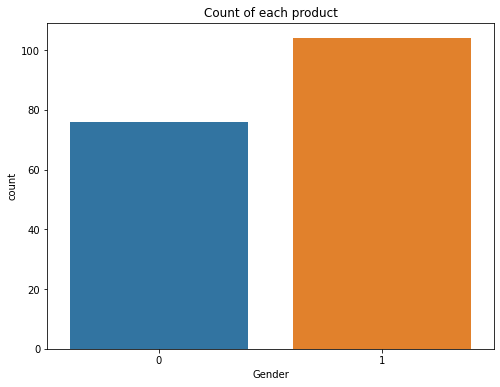

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=df)
plt.title('Count of each product')
plt.show()

#### The male customers tend to buy more than females.

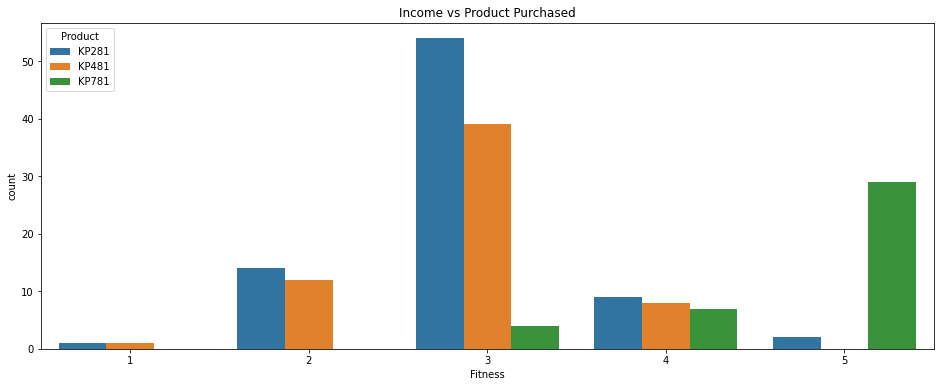

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
sns.countplot(data=df, x='Fitness', hue='Product')
plt.title('Income vs Product Purchased')
plt.show()

#### We have an interesting observation that people that have less interest in fitness they are not interested in buying the Product KP781
#### 2. People who rate themselves as 3 are more interested in fitness and they are buying KP281 and KP481 more in number than anyone.
#### People who rate themselves as 5 are more interested in buying the costlier product i.e. KP781.

#### If we concentrate more on the customers who rate themselves as 3 and 5 would be profitable for the company. 
#### Might be thinkink why level5 right?
#### It is because the product these people tend to buy more is KP781 which is costlier. Even some of them would give the company a good profit and moreover its count is close to 30.

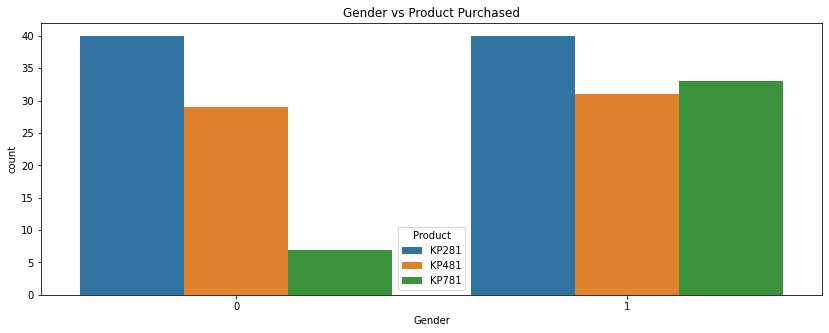

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
sns.countplot(data=df, x='Gender', hue='Product')
plt.title('Gender vs Product Purchased')
plt.show()

#### Male customers tend to buy more in number. Both male and female are buying almost in same number the products KP281 and KP481. KP781 is bought less in number in females and in males it is more.

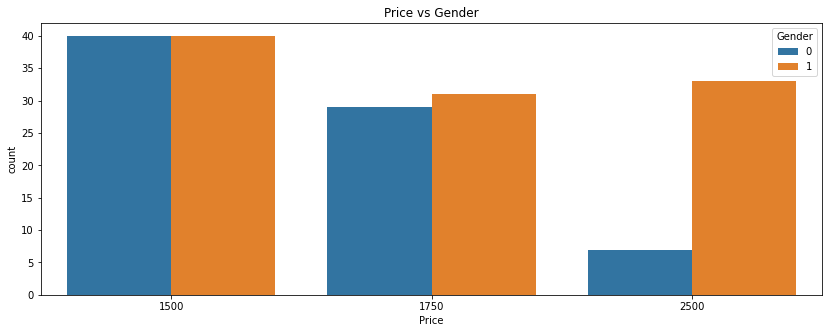

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
sns.countplot(data=df, x='Price', hue='Gender')
plt.title('Price vs Gender')
plt.show()

#### KP281 - Both males and female customers are buying in same number.
#### KP481 - Here Male customers are slightly buying more in number i.e. 2 or 3 more.
#### KP781 - Male customers are clearly buying more in number.

#### Here we can say if the customer is Male there is a high probability that he might buy any of the three but the last product i.e. KP781 is more.

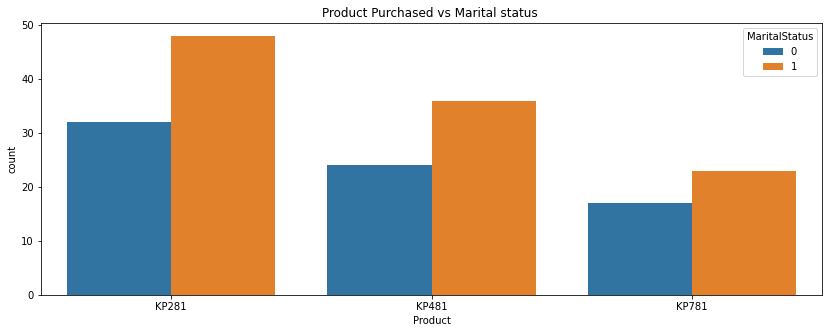

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.title('Product Purchased vs Marital status ')
plt.show()

#### Married customers are buying more in number than unmarried customers.

## Bivariate Analysis

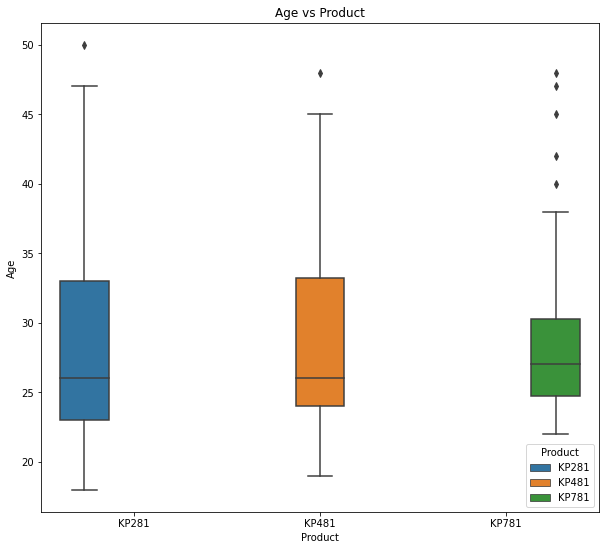

In [34]:
plt.figure(figsize=(10,9))
sns.boxplot(y='Age',x ='Product',data = df,hue='Product')
plt.title('Age vs Product')
plt.show()

#### Customers whose age is in the range of 25-30 buys more KP781.

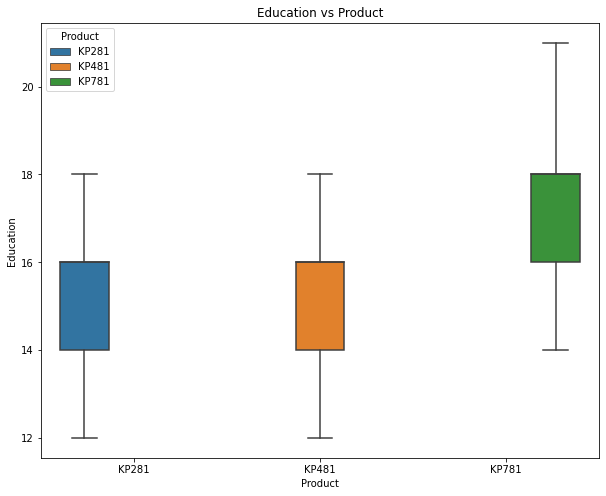

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Education',x ='Product',data = df,hue='Product')
plt.title('Education vs Product')
plt.show()

#### Customers with <16 years of education tends to buy KP281 and KP481.
#### customer with >16 years of education tends to buy KP781.

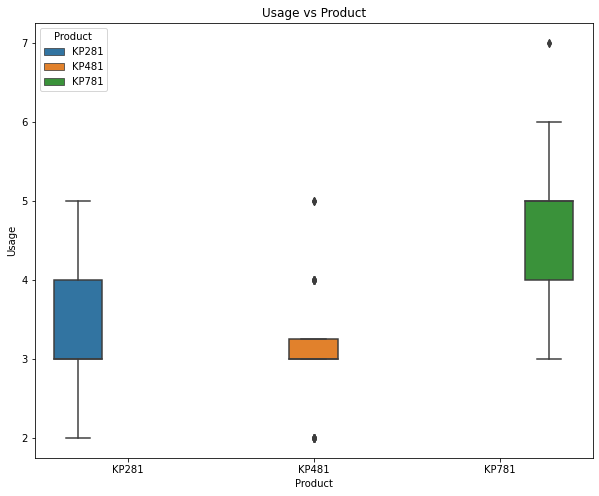

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Usage',x ='Product',data = df,hue='Product')
plt.title('Usage vs Product')
plt.show()

#### People who use atleast 4-5 times a week are more prone to buy KP781.
#### people who use 3-4 times a week are inclined to buy KP281 more and a small group of people buys KP481.

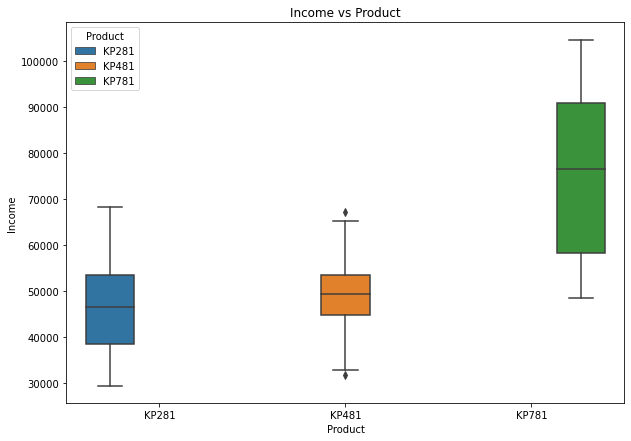

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(y='Income',x ='Product',data = df,hue='Product')
plt.title('Income vs Product')
plt.show()


#### Customer's whose income is more than 58000 tend to buy KP781.

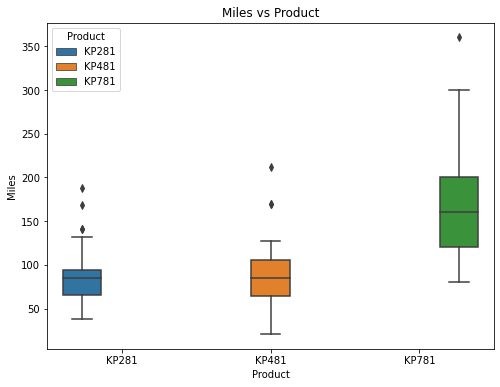

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Miles',x ='Product',data = df,hue='Product')
plt.title('Miles vs Product')
plt.show()

#### customers who buys KP781 are the people who walks/runs more.

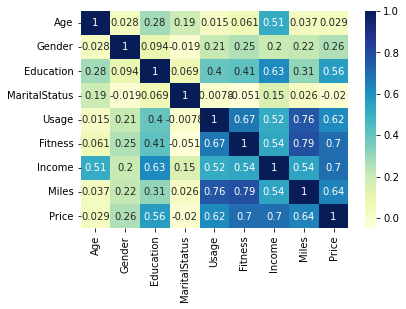

In [39]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

#### 1. Miles and fitness has 79% correlation i.e. higher miles = great fitness.
#### 2. Usage and miles have 76% of correlation which is understandable.
#### 3. Education and Income has good correlation i.e. 63%. Higher the education there is a higher probability that he/she can have good income.
#### 4. Usage and Fitness also has a good correlation i.e. 67%. More the usage higher the fitness
#### 5. Interestingly Price and fitness & Price and Income are 70% correlated i.e. higher the price the more they can spend and people who buy top model are very health conscious
#### People who bought KP781 are 40 and 36 out of them rated themselves their fitness levels above 3 which is 90% of people.

In [40]:
dfp = df[df['Price'] == 2500]

len(dfp[dfp['Fitness']>3])

36

In [41]:
dfm = df[df['Gender'] == 1]
dff = df[df['Gender'] == 0]

In [42]:
len(dfm)

104

In [43]:
len(dff)

76

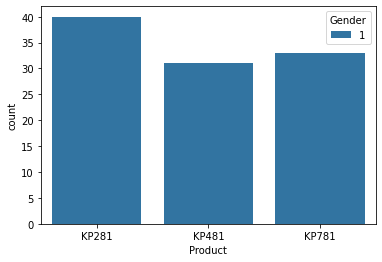

In [44]:
sns.countplot(x='Product', hue='Gender',data=dfm)
plt.show()

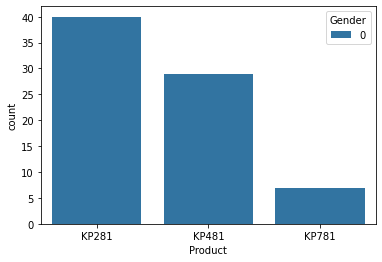

In [45]:
sns.countplot(x='Product', hue='Gender',data=dff)
plt.show()

#### From here we observe that both male customers and female customers are equally buying KP281.
#### But for the product KP781 male customers are buying more than the female.

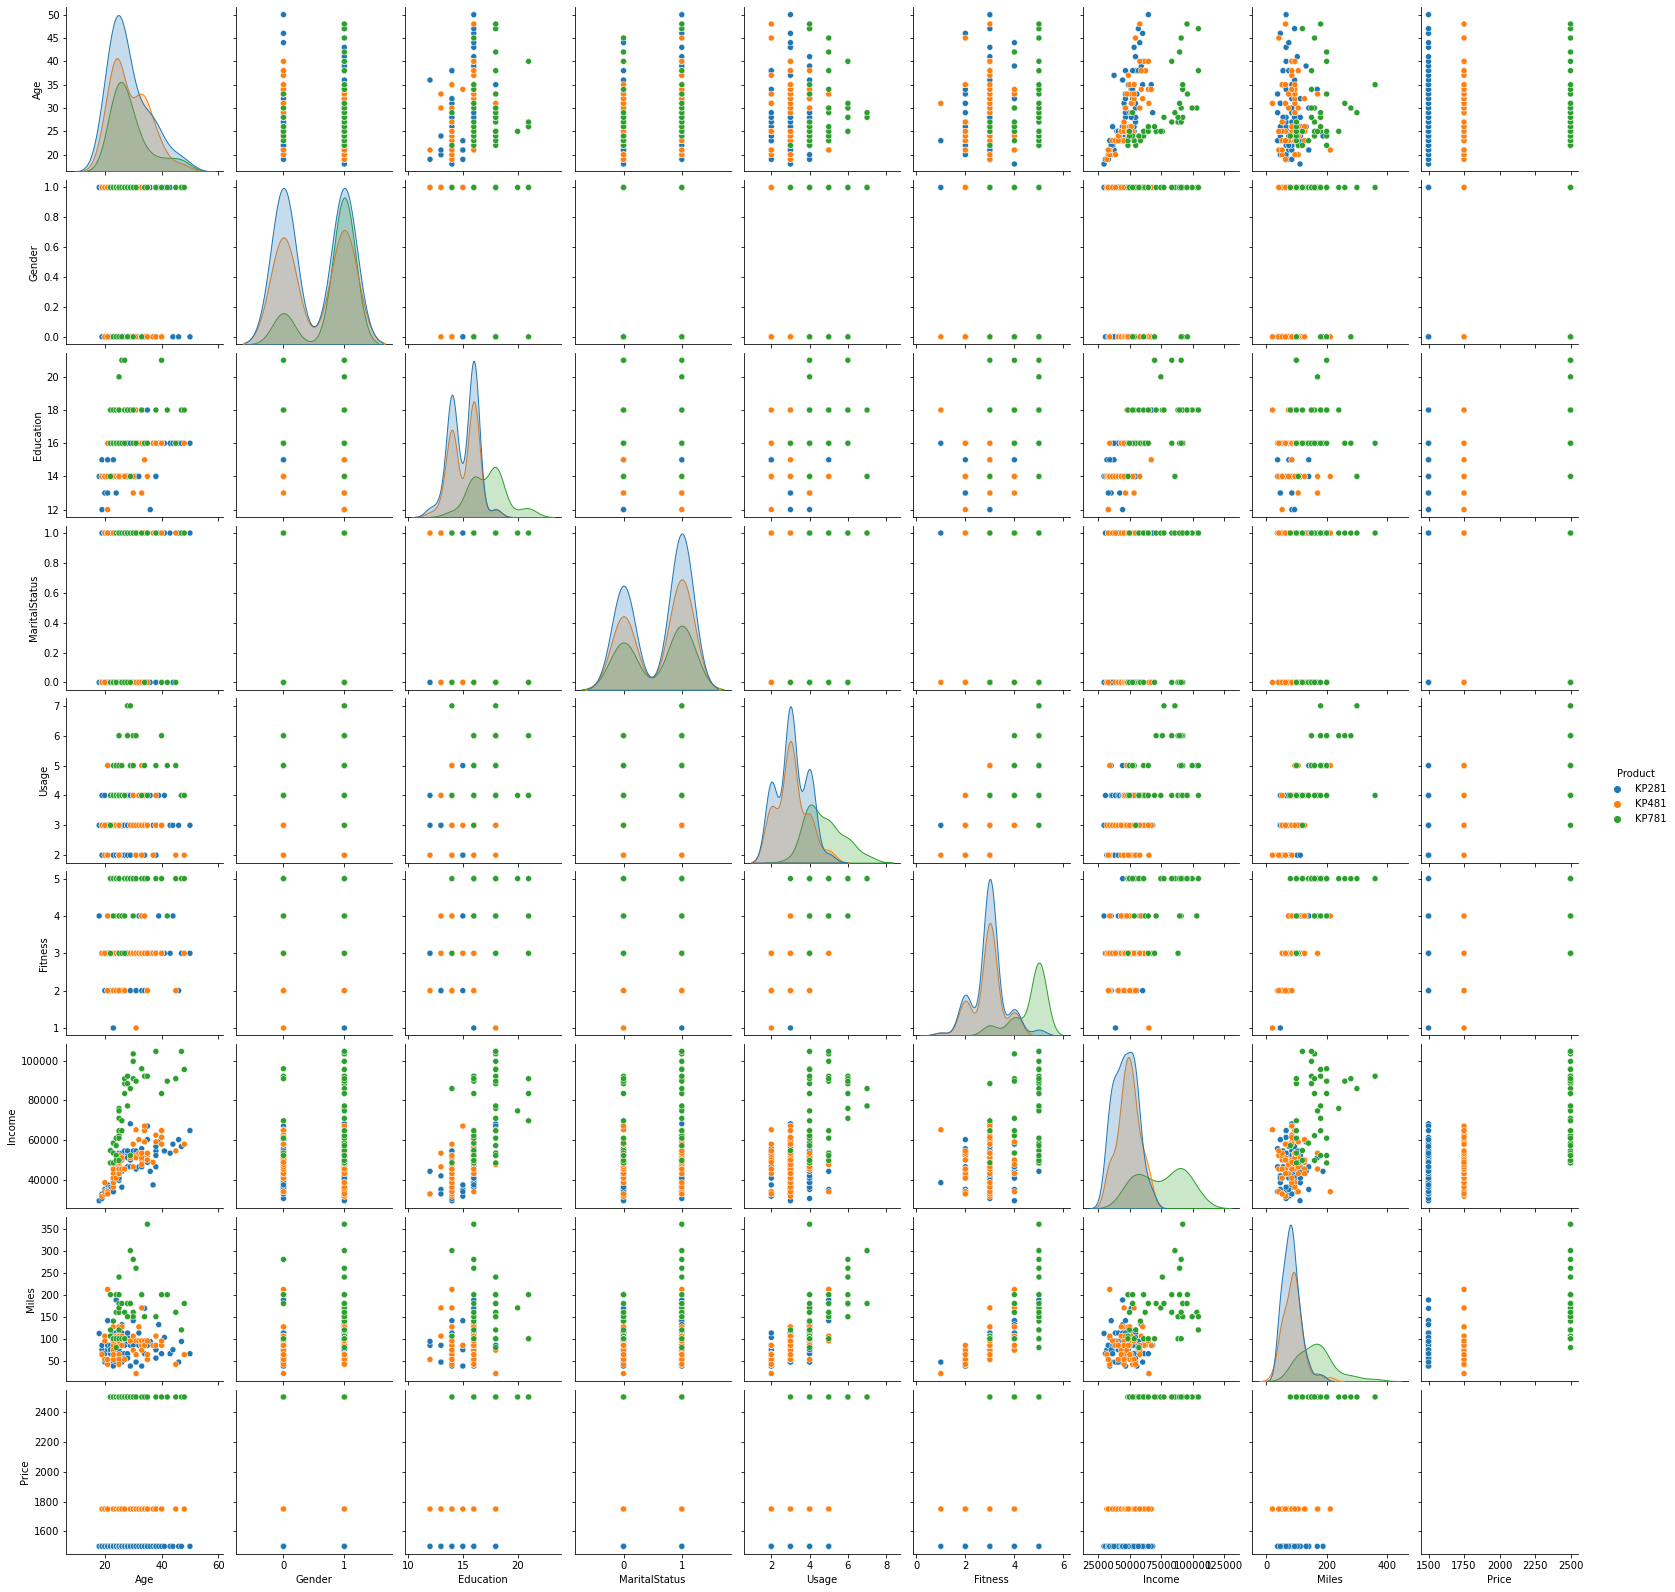

In [46]:
sns.pairplot(data=df, hue='Product')
plt.show()

#### we see a relation between Miles and Age, Miles and Income.

## Marginal Probability

In [47]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

#### People are buying more KP281 in numbers

In [48]:
df['Gender'].value_counts(normalize=True)

1    0.577778
0    0.422222
Name: Gender, dtype: float64

#### There are more male customers than female customers.

In [49]:
df['MaritalStatus'].value_counts(normalize=True)

1    0.594444
0    0.405556
Name: MaritalStatus, dtype: float64

#### 40% of the customers are married and 60% are single.

In [50]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,1,14,0,3,4,29562,112,1500
1,KP281,19,1,15,0,2,3,31836,75,1500
2,KP281,19,0,14,1,4,3,30699,66,1500
3,KP281,19,1,12,0,3,3,32973,85,1500
4,KP281,20,1,13,1,4,2,35247,47,1500


## Conditional Probabilities

In [51]:
pd.crosstab(index=df['Product'], columns=[df['MaritalStatus']],margins=True)

MaritalStatus,0,1,All
Product,,,
KP281,32,48,80
KP481,24,36,60
KP781,17,23,40
All,73,107,180


In [52]:
pmarried = round(107/180,2)
punmarried = round(73/180,2)

pkp781single = round(17/73,2)
pkp481single= round(24/73,2)
pkp281single = round(32/73,2)

pkp781couple = round(23/107,2)
pkp481couple = round(36/107,2)
pkp281couple = round(48/107,2)

print(f'probability of married couple buying is: {pmarried}')
print(f'probability of unmarried couple buying is: {punmarried}')
print(f'probability of buying KP781 given unmarried customer buying is: {pkp781single}')
print(f'probability of buying KP481 given unmarried customer buying is: {pkp481single}')
print(f'probability of buying KP281 given unmarried customer buying is: {pkp281single}')
print(f'probability of buying KP781 given married customer buying is: {pkp781couple}')
print(f'probability of buying KP481 given married customer buying is: {pkp481couple}')
print(f'probability of buying KP281 given married customer buying is: {pkp281couple}')

probability of married couple buying is: 0.59
probability of unmarried couple buying is: 0.41
probability of buying KP781 given unmarried customer buying is: 0.23
probability of buying KP481 given unmarried customer buying is: 0.33
probability of buying KP281 given unmarried customer buying is: 0.44
probability of buying KP781 given married customer buying is: 0.21
probability of buying KP481 given married customer buying is: 0.34
probability of buying KP281 given married customer buying is: 0.45


#### The percentage of buying KP281 in both married and unmarried people are almost close i.e. 45%.

In [53]:
pd.crosstab(index=df['Product'], columns=[df['Fitness']],margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [54]:
p1r = round(2/180,2)
p2r = round(26/180,2)
p3r = round(97/180,2)
p4r = round(24/180,2)
p5r = round(31/180,2)

pkp7811 = round(0/2,2)
pkp4811 = round(1/2,2)
pkp2811 = round(1/2,2)

pkp7812 = round(0/2,2)
pkp4812 = round(12/26,2)
pkp2812 = round(14/26,2)

pkp7813 = round(4/97,2)
pkp4813 = round(39/97,2)
pkp2813 = round(54/97,2)

pkp7814 = round(7/24,2)
pkp4814 = round(8/24,2)
pkp2814 = round(9/24,2)

pkp7815 = round(29/31,2)
pkp4815 = round(0/31,2)
pkp2815 = round(2/31,2)

print(f'probability of 1 rated customer buying is: {p1r}')
print(f'probability of 2 rated customer buying is: {p2r}')
print(f'probability of 3 rated customer buying is: {p3r}')
print(f'probability of 4 rated customer buying is: {p4r}')
print(f'probability of 5 rated customer buying is: {p5r}')

print(f'probability of 1 rated customer buying  KP781 is: {pkp7811}')
print(f'probability of 1 rated customer buying  KP481 is: {pkp4811}')
print(f'probability of 1 rated customer buying  KP281 is: {pkp2811}')

print(f'probability of 2 rated customer buying  KP781 is: {pkp7812}')
print(f'probability of 2 rated customer buying  KP481 is: {pkp4812}')
print(f'probability of 2 rated customer buying  KP281 is: {pkp2812}')

print(f'probability of 3 rated customer buying  KP781 is: {pkp7813}')
print(f'probability of 3 rated customer buying  KP481 is: {pkp4813}')
print(f'probability of 3 rated customer buying  KP281 is: {pkp2813}')

print(f'probability of 4 rated customer buying  KP781 is: {pkp7814}')
print(f'probability of 4 rated customer buying  KP481 is: {pkp4814}')
print(f'probability of 4 rated customer buying  KP281 is: {pkp2814}')

print(f'probability of 5 rated customer buying  KP781 is: {pkp7815}')
print(f'probability of 5 rated customer buying  KP481 is: {pkp4815}')
print(f'probability of 5 rated customer buying  KP281 is: {pkp2815}')

probability of 1 rated customer buying is: 0.01
probability of 2 rated customer buying is: 0.14
probability of 3 rated customer buying is: 0.54
probability of 4 rated customer buying is: 0.13
probability of 5 rated customer buying is: 0.17
probability of 1 rated customer buying  KP781 is: 0.0
probability of 1 rated customer buying  KP481 is: 0.5
probability of 1 rated customer buying  KP281 is: 0.5
probability of 2 rated customer buying  KP781 is: 0.0
probability of 2 rated customer buying  KP481 is: 0.46
probability of 2 rated customer buying  KP281 is: 0.54
probability of 3 rated customer buying  KP781 is: 0.04
probability of 3 rated customer buying  KP481 is: 0.4
probability of 3 rated customer buying  KP281 is: 0.56
probability of 4 rated customer buying  KP781 is: 0.29
probability of 4 rated customer buying  KP481 is: 0.33
probability of 4 rated customer buying  KP281 is: 0.38
probability of 5 rated customer buying  KP781 is: 0.94
probability of 5 rated customer buying  KP481 is: 

#### Customers with an average rating of 3 are the target customer for buying.
#### Customers whose rating of fitness is 3 then they are inclined to buy KP281 i.e. 56%.
#### Customers whose rating is 5, they will buy KP781 with the maximum Probability of 94%.

In [55]:
pd.crosstab(index=df['Product'], columns=[df['Gender']],margins=True)

Gender,0,1,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [56]:
pmale = round(104/180,2)
pfemale = round(76/180,2)

pkp781male = round(33/104,2)
pkp481male= round(31/104,2)
pkp281male = round(40/104,2)

pkp781female = round(7/76,2)
pkp481female = round(29/76,2)
pkp281female = round(40/76,2)

print(f'probability of male customer buying is: {pmale}')
print(f'probability of female customer buying is: {pfemale}')
print(f'probability of buying KP781 given male customer buying is: {pkp781male}')
print(f'probability of buying KP481 given male customer buying is: {pkp481male}')
print(f'probability of buying KP281 given male customer buying is: {pkp281male}')
print(f'probability of buying KP781 given female customer buying is: {pkp781female}')
print(f'probability of buying KP481 given female customer buying is: {pkp481female}')
print(f'probability of buying KP281 given female customer buying is: {pkp281female}')

probability of male customer buying is: 0.58
probability of female customer buying is: 0.42
probability of buying KP781 given male customer buying is: 0.32
probability of buying KP481 given male customer buying is: 0.3
probability of buying KP281 given male customer buying is: 0.38
probability of buying KP781 given female customer buying is: 0.09
probability of buying KP481 given female customer buying is: 0.38
probability of buying KP281 given female customer buying is: 0.53


#### The tendency to buy a treadmil with male customers is more than female i.e. 58%.
#### Female customers are more inclinded to buy KP281 with 53% probability.

In [57]:
pd.crosstab(index=df['Product'], columns=[df['Usage']],margins=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


#### we will not consider the users who want to use it for 7 times per week as the number is too low and it won't make any difference. These are outliers.

In [58]:
p2u = round(33/180,2)
p3u = round(69/180,2)
p4u = round(52/180,2)
p5u = round(17/180,2)
p6u = round(7/180,2)

pkp7812u = round(0/33,2)
pkp4812u = round(14/33,2)
pkp2812u = round(19/33,2)

pkp7813u = round(1/69,2)
pkp4813u = round(31/69,2)
pkp2813u = round(37/69,2)

pkp7814u = round(18/52,2)
pkp4814u = round(12/52,2)
pkp2814u = round(22/52,2)

pkp7815u = round(12/17,2)
pkp4815u = round(3/17,2)
pkp2815u = round(2/17,2)

pkp7816u = round(7/7,2)
pkp4816u = round(0/7,2)
pkp2816u = round(0/7,2)

print(f'probability of cutomer using 2 times perweek buying is: {p2u}')
print(f'probability of cutomer using 3 times perweek buying is: {p3u}')
print(f'probability of cutomer using 4 times perweek buying is: {p4u}')
print(f'probability of cutomer using 5 times perweek buying is: {p5u}')
print(f'probability of cutomer using 6 times perweek buying is: {p6u}')

print(f'probability of 2 rated customer buying  KP781 is: {pkp7812u}')
print(f'probability of 2 rated customer buying  KP481 is: {pkp4812u}')
print(f'probability of 2 rated customer buying  KP281 is: {pkp2812u}')

print(f'probability of 3 rated customer buying  KP781 is: {pkp7813u}')
print(f'probability of 3 rated customer buying  KP481 is: {pkp4813u}')
print(f'probability of 3 rated customer buying  KP281 is: {pkp2813u}')

print(f'probability of 4 rated customer buying  KP781 is: {pkp7814u}')
print(f'probability of 4 rated customer buying  KP481 is: {pkp4814u}')
print(f'probability of 4 rated customer buying  KP281 is: {pkp2814u}')

print(f'probability of 5 rated customer buying  KP781 is: {pkp7815u}')
print(f'probability of 5 rated customer buying  KP481 is: {pkp4815u}')
print(f'probability of 5 rated customer buying  KP281 is: {pkp2815u}')

print(f'probability of 6 rated customer buying  KP781 is: {pkp7816u}')
print(f'probability of 6 rated customer buying  KP481 is: {pkp4816u}')
print(f'probability of 6 rated customer buying  KP281 is: {pkp2816u}')

probability of cutomer using 2 times perweek buying is: 0.18
probability of cutomer using 3 times perweek buying is: 0.38
probability of cutomer using 4 times perweek buying is: 0.29
probability of cutomer using 5 times perweek buying is: 0.09
probability of cutomer using 6 times perweek buying is: 0.04
probability of 2 rated customer buying  KP781 is: 0.0
probability of 2 rated customer buying  KP481 is: 0.42
probability of 2 rated customer buying  KP281 is: 0.58
probability of 3 rated customer buying  KP781 is: 0.01
probability of 3 rated customer buying  KP481 is: 0.45
probability of 3 rated customer buying  KP281 is: 0.54
probability of 4 rated customer buying  KP781 is: 0.35
probability of 4 rated customer buying  KP481 is: 0.23
probability of 4 rated customer buying  KP281 is: 0.42
probability of 5 rated customer buying  KP781 is: 0.71
probability of 5 rated customer buying  KP481 is: 0.18
probability of 5 rated customer buying  KP281 is: 0.12
probability of 6 rated customer buyi

#### The probability of customer with 2,3 times usage per week buying KP781 is 0%. There is higher chance that this customer buys KP281 and the next option would be KP481.
#### Customer who intended to use for 5 times a week will mostly got with KP781 with 71% probability.
#### Customer who intends to use for 6 times will definitely go with KP781 with 100% probability.

# Conclusions

#### 1. The company can target the customers who are in the age group of 25-30, which might increase the sales.
#### 2. Married couple will mostly buy KP281.
#### 3. If the Fitness level of the customer is >=3 then there is a high chance to buy the treadmil.
#### 4. Customer whose fitness level is 3 there is a high probability that he/she might buy KP281 with 54%.
#### 5. Customer whose fitness level is 5 there is a high probability that he/she might buy KP781 with 94%.
#### 6. Female customers are not interested in buying KP781 and male customers are not interested in buying KP481.
#### 7. If customer is planning to use it for 2 or 3 times a week then there is a high probability that they will not buy the treadmil.
#### 8. Customers who are planning to use the treadmil for 5 or 6 times a week are definitely going to buy the treadmil with 71% and 100% probabilities.
#### 9. If the customers income is >60,000 then there is a high chance that these customers will buy KP781. People with 16-18 years of education are earning more.
#### 10. Customers in the age group of 25-32 are more likely that they would buy a treadmil.